In [ ]:
from ultralytics.data.annotator import auto_annotate

# Modify these paths according to your setup
data_path = "dataset/frames"  # Path to the folder containing your images
det_model = "yolov9e.pt"  # Path to a pre-trained YOLO detection model (e.g., yolov8n.pt)
output_dir = "dataset/annotations"  # Path to the folder where the annotations will be saved

# Run automatic annotation
auto_annotate(data=data_path, det_model=det_model, output_dir=output_dir)

print("Automatic annotation completed. Please review and adjust annotations as needed.")

### Auto annotations

In [ ]:
import os
from ultralytics import YOLO

# Load the YOLO model
model = YOLO('yolov9e.pt')

# Get all image filenames in the 'dataset/frames/' directory
image_dir = 'dataset/frames/'
image_filenames = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Iterate through each image filename
for image_filename in image_filenames:
    # Extract the image name without extension

    image_path = os.path.join(image_dir, image_filename)

    # Perform object detection with YOLO
    predictions = model(image_path, save_txt=True)  

### Save with class names

In [3]:
with open("predicted_labels.txt", '+w') as file:
      for idx, prediction in enumerate(predictions[0].boxes.xywhn): # change final attribute to desired box format
          cls = int(predictions[0].boxes.cls[idx].item())
          path = predictions[0].path
          class_name = model.names[cls]
          # Write line to file in YOLO label format : cls x y w h
          file.write(f"{path} {class_name} {cls} {prediction[0].item()} {prediction[1].item()} {prediction[2].item()} {prediction[3].item()}\n")

### Visualise and verify annotations

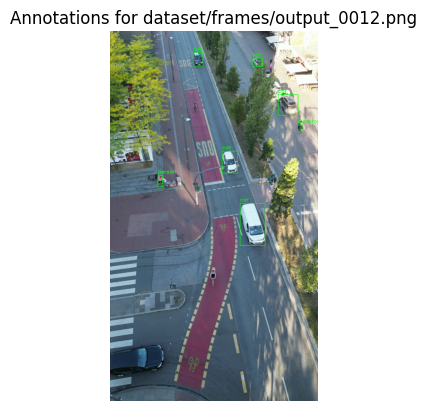

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import yaml
from collections import defaultdict

def load_class_names(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
        class_names = data['names']
    return class_names

def plot_annotations(annotation_file, class_names_file):
    # Create a dictionary to store annotations for each image
    annotations = defaultdict(list)
    
    # Extract the base name of the annotation file
    base_name = os.path.splitext(os.path.basename(annotation_file))[0]
    
    # Construct the corresponding image path
    image_path = os.path.join('dataset', 'frames', f'{base_name}.png')
    
    # Read the annotation file
    with open(annotation_file, 'r') as file:
        lines = file.readlines()

    # Parse the annotations and store them in the dictionary
    for line in lines:
        parts = line.strip().split()
        class_index = parts[0]
        x_center, y_center, width, height = map(float, parts[1:])
        annotations[image_path].append((class_index, x_center, y_center, width, height))
    
    # Load class names
    class_names = load_class_names(class_names_file)
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return
    
    h, w = image.shape[:2]

    # Draw all the annotations on the image
    for class_index, x_center, y_center, width, height in annotations[image_path]:
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)

        color = (0, 255, 0)  # Green color for bounding box
        class_name = class_names[int(class_index)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    # Display the image with all annotations
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f'Annotations for {image_path}')
    plt.show()

# Call the function with your annotation file
plot_annotations('dataset/annotations/output_0012.txt', 'dataset/data.yml')